In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import rasterio 
import seaborn as sns 
import warnings 
import numpy as np 

In [51]:
warnings.filterwarnings("ignore")



In [99]:
band_path = "C:/ML_DS_WORKSHOP/3rd jan"
def read_band(band_path):
    with rasterio.open(band_path) as src:
        return src.read(1).astype(np.float32)/1000 #it for the  img file read 

In [100]:
band_paths ={
    "B2": "C:/ML_DS_WORKSHOP/3rd jan/2025-01-03-00_00_2025-01-03-23_59_Sentinel-2_L2A_B02_(Raw).tiff",
    "B4": "C:/ML_DS_WORKSHOP/3rd jan/2025-01-03-00_00_2025-01-03-23_59_Sentinel-2_L2A_B04_(Raw).tiff",
    "B8": "C:/ML_DS_WORKSHOP/3rd jan/2025-01-03-00_00_2025-01-03-23_59_Sentinel-2_L2A_B08_(Raw).tiff",
    "B11":"C:/ML_DS_WORKSHOP/3rd jan/2025-01-03-00_00_2025-01-03-23_59_Sentinel-2_L2A_B11_(Raw).tiff"}

In [101]:
data = {}
for key, path in band_paths.items():
    try:
        data[key]=read_band(path)
    except Exception as e:
        print (f"error loading{key}:{e}")

In [102]:
def safe_divide(numerator,denominator):
    return np.where(denominator==0,np.nan,numerator/denominator)

ndvi = safe_divide(data["B8"]- data["B4"],data["B8"]+ data["B4"])
ndvi = safe_divide(data["B8"]- data["B11"],data["B8"]+ data["B11"])
bsi = safe_divide((data["B11"]- data["B4"])-(data["B8"]+data["B2"]),(data["B11"]- data["B4"])+(data["B8"]+data["B2"]))
ioi=safe_divide(data["B8"]+ data["B11"],data["B8"]-data["B11"])

In [103]:
def plot_heatmap(index, title, cmap):
    plt.figure(figsize=(10,6))
    sns.heatmap(index , cmap=cmap, cbar=True ,square=True ,xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()


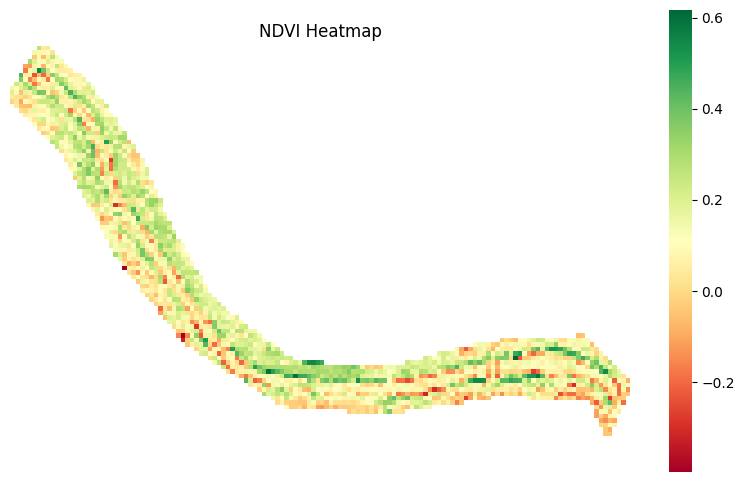

In [104]:
plot_heatmap(ndvi,"NDVI Heatmap",cmap="RdYlGn")#green for vegetation 

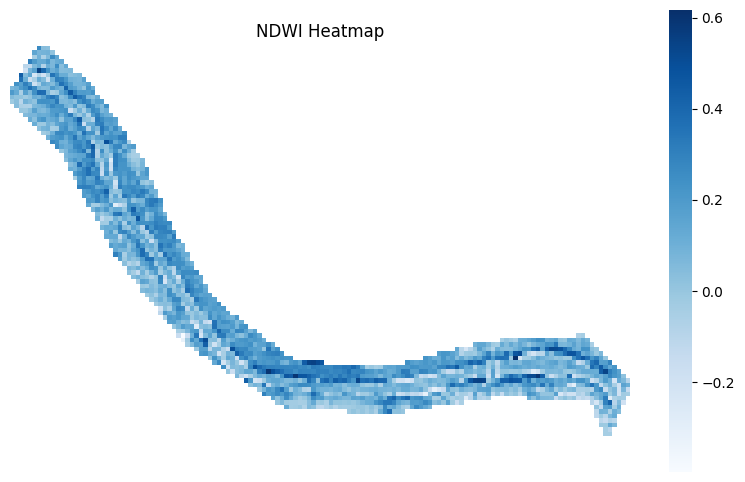

In [105]:
plot_heatmap(ndvi,"NDWI Heatmap",cmap="Blues")#blue for woter content

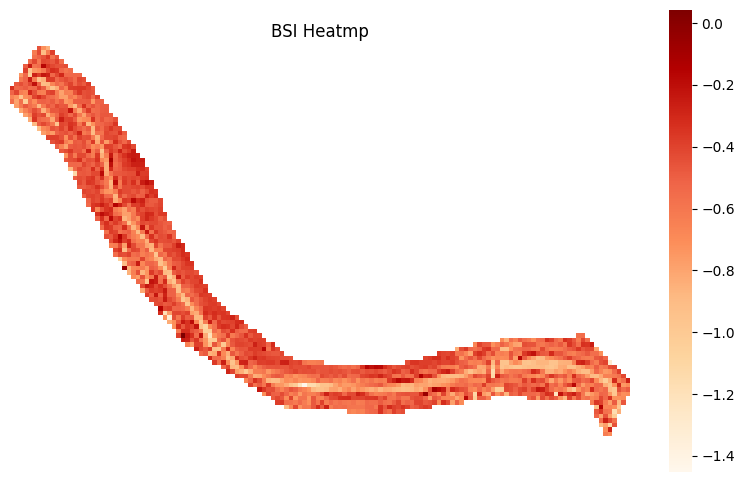

In [106]:
plot_heatmap(bsi,"BSI Heatmp",cmap="OrRd")#orange for bare  soil 

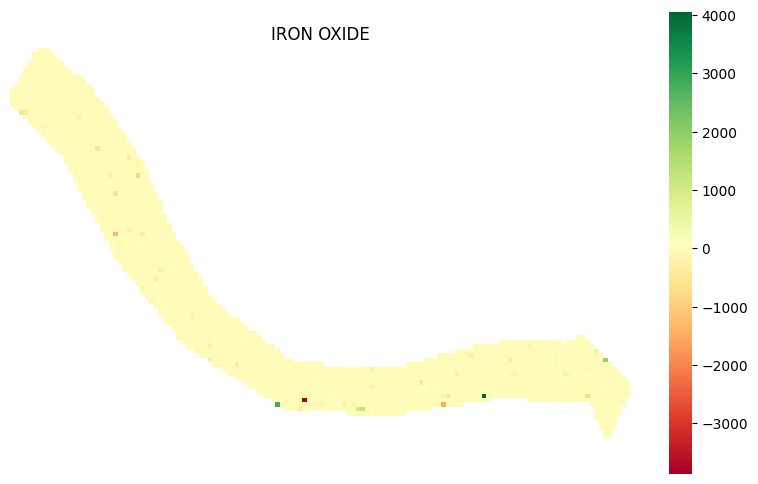

In [95]:
plot_heatmap(ioi,"IRON OXIDE",cmap="RdYlGn")#red-green for iron oxide

In [1]:
#DAY 3

In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime
import scipy.stats as stats

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to read Sentinel-2 band and return shape
def read_band(band_path):
    with rasterio.open(band_path) as src:
        return src.read(1).astype(np.float32) / 10000  # Normalize

In [3]:
def compute_indices(data):
    # Print keys and shapes for debugging (optional, remove if not needed)
    print("Keys in data:", data.keys())
    for key, arr in data.items():
        print(f"Shape of {key}: {arr.shape}")

    # Check if all arrays have the same shape
    shapes = [arr.shape for arr in data.values()]
    if not all(shape == shapes[0] for shape in shapes):
        raise ValueError(f"Shape mismatch in bands: {shapes}")

    # Compute indices using correct keys
    ndvi = safe_divide(data["B08"] - data["B04"], data["B08"] + data["B04"])
    ndwi = safe_divide(data["B08"] - data["B11"], data["B08"] + data["B11"])
    bsi = safe_divide((data["B11"] + data["B04"]) - (data["B08"] + data["B02"]), 
                      (data["B11"] + data["B04"]) + (data["B08"] + data["B02"]))
    ioi = safe_divide(data["B04"] + data["B08"], data["B04"] - data["B08"])
    return ndvi, ndwi, bsi, ioi

# Safe division
def safe_divide(numerator, denominator):
    return np.where(denominator == 0, np.nan, numerator / denominator)

In [4]:
# Define dates (month-day) based on your previous output
dates = [
    "01-03", "01-28",  # January
    "02-07", "02-27",  # February
    "03-09", "03-31"   #March
]

# Initialize dictionaries to store index values over time
index_values = {
    "NDVI": [],
    "NDWI": [],
    "BSI": [],
    "IOI": []
}

# Bands to process
bands = ["B02", "B04", "B08", "B11"]

# Process each date
for date in dates:
    band_paths = {band: f"{date}{band}_(Raw).tiff" for band in bands}  # e.g., "01-03B02_(Raw).tiff"

    data = {}
    # Load bands
    for key, path in band_paths.items():
        if os.path.exists(path):  # Check if file exists
            try:
                data[key] = read_band(path)
                print(f"Loaded {path} with key {key}, shape: {data[key].shape}")
            except Exception as e:
                print(f"Error loading {key} for {date}: {e}")
        else:
            print(f"File not found: {path}")

    # Ensure all bands are loaded and have the same shape
    if len(data) == 4:
        try:
            # Compute indices
            ndvi, ndwi, bsi, ioi = compute_indices(data)

            # Store mean values (ignoring NaN)
            index_values["NDVI"].append(np.nanmean(ndvi))
            index_values["NDWI"].append(np.nanmean(ndwi))
            index_values["BSI"].append(np.nanmean(bsi))
            index_values["IOI"].append(np.nanmean(ioi))
        except (ValueError, KeyError) as e:
            print(f"Error processing {date}: {e}")
    else:
        print(f"Skipping {date}: Not all bands loaded. Loaded {len(data)} out of 4.")

File not found: 01-03B02_(Raw).tiff
File not found: 01-03B04_(Raw).tiff
File not found: 01-03B08_(Raw).tiff
File not found: 01-03B11_(Raw).tiff
Skipping 01-03: Not all bands loaded. Loaded 0 out of 4.
File not found: 01-28B02_(Raw).tiff
File not found: 01-28B04_(Raw).tiff
File not found: 01-28B08_(Raw).tiff
File not found: 01-28B11_(Raw).tiff
Skipping 01-28: Not all bands loaded. Loaded 0 out of 4.
File not found: 02-07B02_(Raw).tiff
File not found: 02-07B04_(Raw).tiff
File not found: 02-07B08_(Raw).tiff
File not found: 02-07B11_(Raw).tiff
Skipping 02-07: Not all bands loaded. Loaded 0 out of 4.
File not found: 02-27B02_(Raw).tiff
File not found: 02-27B04_(Raw).tiff
File not found: 02-27B08_(Raw).tiff
File not found: 02-27B11_(Raw).tiff
Skipping 02-27: Not all bands loaded. Loaded 0 out of 4.
File not found: 03-09B02_(Raw).tiff
File not found: 03-09B04_(Raw).tiff
File not found: 03-09B08_(Raw).tiff
File not found: 03-09B11_(Raw).tiff
Skipping 03-09: Not all bands loaded. Loaded 0 out o